In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
plt.style.use('ggplot')

# Point 1, reversion

create dataframe

In [2]:
data_siu9 = pd.read_csv("data/SiU9.txt")
data_sih9 = pd.read_csv("data/SiH9.txt")
data_sim9 = pd.read_csv("data/SiM9.txt")
data_siz9 = pd.read_csv("data/SiZ9.txt")

data = pd.DataFrame()
data['close_siu9'] = data_siu9['<CLOSE>']
data['close_sih9'] = data_sih9['<CLOSE>']
data['close_sim9'] = data_sim9['<CLOSE>']

data['close_siz9'] = data_siz9['<CLOSE>']
data

,close_siu9,close_sih9,close_sim9,close_siz9
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,65884.0
2,67047.0,NaN,NaN,NaN
3,66871.0,NaN,66030.0,65081.0
4,67150.0,NaN,NaN,65255.0
...,...,...,...,...
514,64254.0,NaN,NaN,NaN
515,64001.0,NaN,NaN,NaN
516,64346.0,NaN,NaN,NaN
517,64220.0,NaN,NaN,NaN


In [3]:
# number of NaN
data.isna().sum()

close_siu9    111
close_sih9    103
close_sim9    114
close_siz9    110
dtype: int64

In [4]:
# finished dataset
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index'],axis = 1, inplace=True)

In [5]:
data

,close_siu9,close_sih9,close_sim9,close_siz9
0,65491.0,64904.0,67576.0,63090.0
1,64829.0,64988.0,67300.0,61893.0
2,65235.0,64672.0,67299.0,60949.0
3,65901.0,64044.0,67110.0,61523.0
4,64500.0,64625.0,65571.0,62350.0
...,...,...,...,...
283,66875.0,66095.0,64969.0,62891.0
284,67177.0,65746.0,64821.0,62451.0
285,66240.0,65500.0,64613.0,62506.0
286,66239.0,65590.0,64576.0,62553.0


/tmp/ipykernel_26871/3053685069.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pylab.subplot (2, 2, 1)


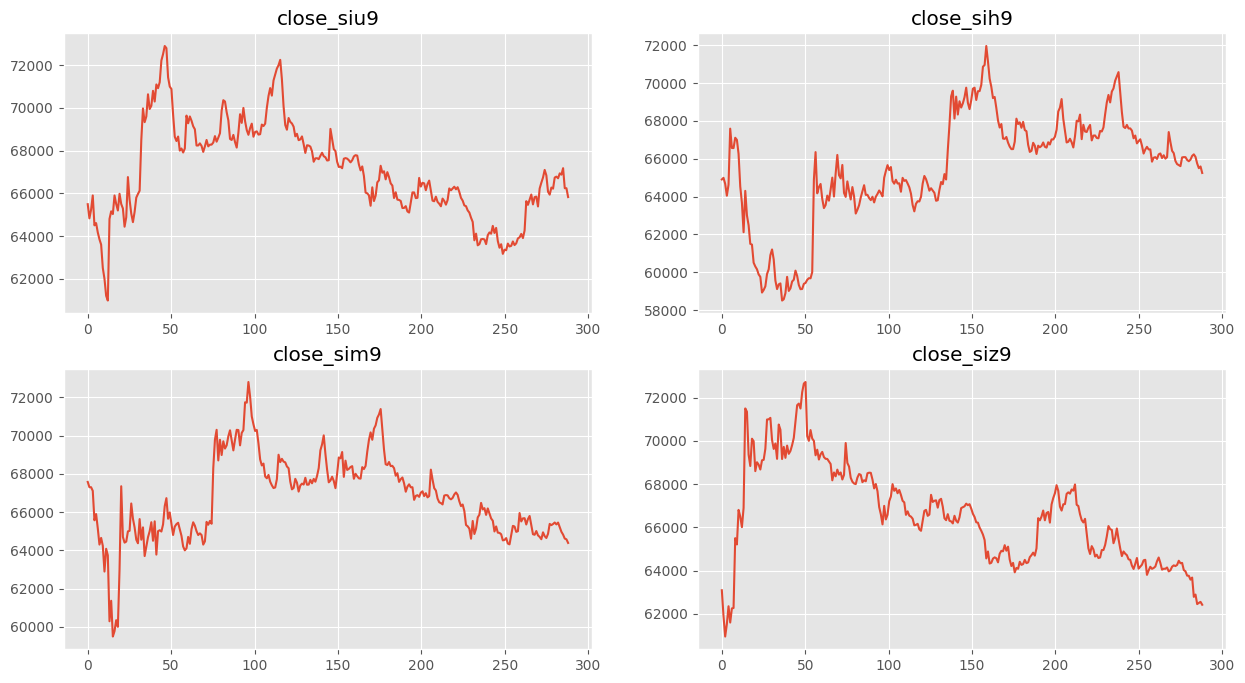

In [6]:
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots()

# Две строки, два столбца. Текущая ячейка - 1
pylab.subplot (2, 2, 1)
plt.plot(np.linspace(0, len(data), len(data)), data['close_siu9'])
pylab.title ("close_siu9")

pylab.subplot (2, 2, 2)
plt.plot(np.linspace(0, len(data), len(data)), data['close_sih9'])
pylab.title ("close_sih9")

pylab.subplot (2, 2, 3)
plt.plot(np.linspace(0, len(data), len(data)), data['close_sim9'])
pylab.title ("close_sim9")

pylab.subplot (2, 2, 4)
plt.plot(np.linspace(0, len(data), len(data)), data['close_siz9'])
pylab.title ("close_siz9")


fig.set_figwidth(15)
fig.set_figheight(8)

plt.show()


In [7]:
def get_return(dataframe, column):
    returnn = []
    data = dataframe[column]
    for i in range(1, len(data)):
        returnn.append((data[i] / data[i - 1]) - 1)
    return returnn

In [8]:
return_siu9 = pd.DataFrame({'return_siu9': get_return(data, 'close_siu9')})
return_sih9 = pd.DataFrame({'return_sih9': get_return(data, 'close_sih9')})
return_sim9 = pd.DataFrame({'return_sim9': get_return(data, 'close_sim9')})
return_siz9 = pd.DataFrame({'return_siz9': get_return(data, 'close_siz9')})

In [9]:
return_data = pd.DataFrame()
return_data = pd.concat([return_siu9, return_sih9, return_sim9, return_siz9], axis=1)
return_data

,return_siu9,return_sih9,return_sim9,return_siz9
0,-0.010108,0.001294,-0.004084,-0.018973
1,0.006263,-0.004862,-0.000015,-0.015252
2,0.010209,-0.009711,-0.002808,0.009418
3,-0.021259,0.009072,-0.022932,0.013442
4,0.001612,0.045896,0.004987,-0.012077
...,...,...,...,...
282,-0.000881,-0.002068,-0.003803,0.001688
283,0.004516,-0.005280,-0.002278,-0.006996
284,-0.013948,-0.003742,-0.003209,0.000881
285,-0.000015,0.001374,-0.000573,0.000752


In [10]:
data.drop(index=0, inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index'],axis = 1, inplace=True)
data = pd.concat([data, return_data], axis=1)
data

,close_siu9,close_sih9,close_sim9,close_siz9,return_siu9,return_sih9,return_sim9,return_siz9
0,64829.0,64988.0,67300.0,61893.0,-0.010108,0.001294,-0.004084,-0.018973
1,65235.0,64672.0,67299.0,60949.0,0.006263,-0.004862,-0.000015,-0.015252
2,65901.0,64044.0,67110.0,61523.0,0.010209,-0.009711,-0.002808,0.009418
3,64500.0,64625.0,65571.0,62350.0,-0.021259,0.009072,-0.022932,0.013442
4,64604.0,67591.0,65898.0,61597.0,0.001612,0.045896,0.004987,-0.012077
...,...,...,...,...,...,...,...,...
282,66875.0,66095.0,64969.0,62891.0,-0.000881,-0.002068,-0.003803,0.001688
283,67177.0,65746.0,64821.0,62451.0,0.004516,-0.005280,-0.002278,-0.006996
284,66240.0,65500.0,64613.0,62506.0,-0.013948,-0.003742,-0.003209,0.000881
285,66239.0,65590.0,64576.0,62553.0,-0.000015,0.001374,-0.000573,0.000752


### Create alphas

In [11]:
neutralize_return = np.zeros((len(data), 4))
for i, row in enumerate(data.itertuples()):
    for j in range(5, 9):
        neutralize_return[i][j - 5] = (row[j] - (row[5] + row[6] + row[7] + row[8]) / 4)

data['neutrl_siu9'] = neutralize_return[:, 0]
data['neutrl_sih9'] = neutralize_return[:, 1]
data['neutrl_sim9'] = neutralize_return[:, 2]
data['neutrl_siz9'] = neutralize_return[:, 3]

In [12]:
data

,close_siu9,close_sih9,close_sim9,close_siz9,return_siu9,return_sih9,return_sim9,return_siz9,neutrl_siu9,neutrl_sih9,neutrl_sim9,neutrl_siz9
0,64829.0,64988.0,67300.0,61893.0,-0.010108,0.001294,-0.004084,-0.018973,-0.002140,0.009262,0.003884,-0.011005
1,65235.0,64672.0,67299.0,60949.0,0.006263,-0.004862,-0.000015,-0.015252,0.009729,-0.001396,0.003452,-0.011785
2,65901.0,64044.0,67110.0,61523.0,0.010209,-0.009711,-0.002808,0.009418,0.008432,-0.011488,-0.004585,0.007641
3,64500.0,64625.0,65571.0,62350.0,-0.021259,0.009072,-0.022932,0.013442,-0.015840,0.014491,-0.017513,0.018862
4,64604.0,67591.0,65898.0,61597.0,0.001612,0.045896,0.004987,-0.012077,-0.008492,0.035791,-0.005118,-0.022181
...,...,...,...,...,...,...,...,...,...,...,...,...
282,66875.0,66095.0,64969.0,62891.0,-0.000881,-0.002068,-0.003803,0.001688,0.000385,-0.000802,-0.002537,0.002954
283,67177.0,65746.0,64821.0,62451.0,0.004516,-0.005280,-0.002278,-0.006996,0.007026,-0.002771,0.000232,-0.004487
284,66240.0,65500.0,64613.0,62506.0,-0.013948,-0.003742,-0.003209,0.000881,-0.008944,0.001263,0.001796,0.005885
285,66239.0,65590.0,64576.0,62553.0,-0.000015,0.001374,-0.000573,0.000752,-0.000400,0.000989,-0.000957,0.000367


In [13]:
# создание коэффициентов
return_plus = []
return_minus =[]
neutralize_return = np.zeros((len(data), 4))
alphas = np.zeros((len(data), 4))
for i, row in enumerate(data.itertuples()):    
    temp_plus = 0
    temp_minus = 0
    for j in range(9, 13):
        if row[j] > 0:
            temp_plus += row[j]
        else:
            temp_minus += row[j]

    # create alphas
    for j in range(9, 13):
        if neutralize_return[i][j - 9] > 0:
            alphas[i][j - 9] = (-row[j] / temp_plus) / 2
        else:
            alphas[i][j - 9] = (row[j] / temp_minus) / 2

    # return_plus.append(temp_plus)
    # return_minus.append(temp_minus)
        

In [14]:
data['alpha_siu9'] = alphas[:, 0]
data['alpha_sih9'] = alphas[:, 1]
data['alpha_sim9'] = alphas[:, 2]
data['alpha_siz9'] = alphas[:, 3]

In [15]:
data

,close_siu9,close_sih9,close_sim9,close_siz9,return_siu9,return_sih9,return_sim9,return_siz9,neutrl_siu9,neutrl_sih9,neutrl_sim9,neutrl_siz9,alpha_siu9,alpha_sih9,alpha_sim9,alpha_siz9
0,64829.0,64988.0,67300.0,61893.0,-0.010108,0.001294,-0.004084,-0.018973,-0.002140,0.009262,0.003884,-0.011005,0.081414,-0.352288,-0.147712,0.418586
1,65235.0,64672.0,67299.0,60949.0,0.006263,-0.004862,-0.000015,-0.015252,0.009729,-0.001396,0.003452,-0.011785,-0.369062,0.052944,-0.130938,0.447056
2,65901.0,64044.0,67110.0,61523.0,0.010209,-0.009711,-0.002808,0.009418,0.008432,-0.011488,-0.004585,0.007641,-0.262312,0.357357,0.142643,-0.237688
3,64500.0,64625.0,65571.0,62350.0,-0.021259,0.009072,-0.022932,0.013442,-0.015840,0.014491,-0.017513,0.018862,0.237457,-0.217242,0.262543,-0.282758
4,64604.0,67591.0,65898.0,61597.0,0.001612,0.045896,0.004987,-0.012077,-0.008492,0.035791,-0.005118,-0.022181,0.118634,-0.500000,0.071492,0.309874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,66875.0,66095.0,64969.0,62891.0,-0.000881,-0.002068,-0.003803,0.001688,0.000385,-0.000802,-0.002537,0.002954,-0.057595,0.120156,0.379844,-0.442405
283,67177.0,65746.0,64821.0,62451.0,0.004516,-0.005280,-0.002278,-0.006996,0.007026,-0.002771,0.000232,-0.004487,-0.484040,0.190888,-0.015960,0.309112
284,66240.0,65500.0,64613.0,62506.0,-0.013948,-0.003742,-0.003209,0.000881,-0.008944,0.001263,0.001796,0.005885,0.500000,-0.070599,-0.100388,-0.329013
285,66239.0,65590.0,64576.0,62553.0,-0.000015,0.001374,-0.000573,0.000752,-0.000400,0.000989,-0.000957,0.000367,0.147273,-0.364625,0.352727,-0.135375


In [16]:
data.to_csv('data.csv', index=False)

In [17]:
def get_profit(dataframe, column_data, column_alpha):
    profit = []
    data = dataframe[column_data]
    alpha = dataframe[column_alpha]
    for i in range(1, len(data)):
        profit.append((data[i] - data[i - 1]) * alpha[i - 1])
    return profit


In [18]:
profit_siu9 = get_profit(data, 'close_siu9', 'alpha_siu9')
profit_sih9 = get_profit(data, 'close_sih9', 'alpha_sih9')
profit_sim9 = get_profit(data, 'close_sim9', 'alpha_sim9')
profit_siz9 = get_profit(data, 'close_siz9', 'alpha_siz9')

In [19]:
l = list(map(sum, zip(profit_siu9, profit_sih9, profit_sim9, profit_siz9)))
l.insert(0, 0)
data['profit'] = l
data

,close_siu9,close_sih9,close_sim9,close_siz9,return_siu9,return_sih9,return_sim9,return_siz9,neutrl_siu9,neutrl_sih9,neutrl_sim9,neutrl_siz9,alpha_siu9,alpha_sih9,alpha_sim9,alpha_siz9,profit
0,64829.0,64988.0,67300.0,61893.0,-0.010108,0.001294,-0.004084,-0.018973,-0.002140,0.009262,0.003884,-0.011005,0.081414,-0.352288,-0.147712,0.418586,0.000000
1,65235.0,64672.0,67299.0,60949.0,0.006263,-0.004862,-0.000015,-0.015252,0.009729,-0.001396,0.003452,-0.011785,-0.369062,0.052944,-0.130938,0.447056,-250.620969
2,65901.0,64044.0,67110.0,61523.0,0.010209,-0.009711,-0.002808,0.009418,0.008432,-0.011488,-0.004585,0.007641,-0.262312,0.357357,0.142643,-0.237688,2.313110
3,64500.0,64625.0,65571.0,62350.0,-0.021259,0.009072,-0.022932,0.013442,-0.015840,0.014491,-0.017513,0.018862,0.237457,-0.217242,0.262543,-0.282758,159.027455
4,64604.0,67591.0,65898.0,61597.0,0.001612,0.045896,0.004987,-0.012077,-0.008492,0.035791,-0.005118,-0.022181,0.118634,-0.500000,0.071492,0.309874,-320.877366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,66875.0,66095.0,64969.0,62891.0,-0.000881,-0.002068,-0.003803,0.001688,0.000385,-0.000802,-0.002537,0.002954,-0.057595,0.120156,0.379844,-0.442405,92.629064
283,67177.0,65746.0,64821.0,62451.0,0.004516,-0.005280,-0.002278,-0.006996,0.007026,-0.002771,0.000232,-0.004487,-0.484040,0.190888,-0.015960,0.309112,79.113252
284,66240.0,65500.0,64613.0,62506.0,-0.013948,-0.003742,-0.003209,0.000881,-0.008944,0.001263,0.001796,0.005885,0.500000,-0.070599,-0.100388,-0.329013,426.907977
285,66239.0,65590.0,64576.0,62553.0,-0.000015,0.001374,-0.000573,0.000752,-0.000400,0.000989,-0.000957,0.000367,0.147273,-0.364625,0.352727,-0.135375,-18.603216


In [20]:
def profit_and_loss(dataframe):
    p_and_l = []
    for i in range(len(dataframe)):
        p_and_l.append(dataframe.head(i).sum())
    return p_and_l

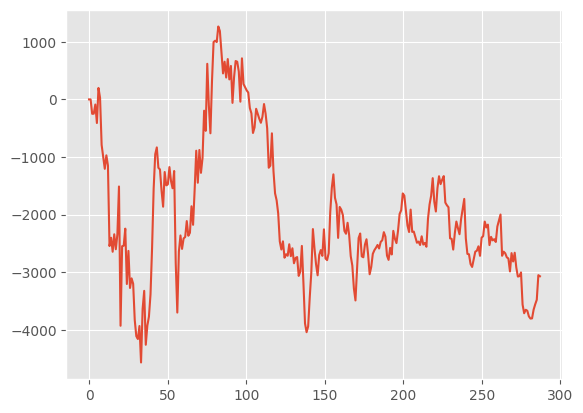

In [21]:
plt.plot(np.linspace(0, len(data), len(data)), profit_and_loss(data['profit']))

# Point 2

### Creating a dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import datetime as DT
import pandas as pd
plt.style.use('ggplot')

In [23]:
start_date = DT.datetime(2017, 12, 15)
end_date = DT.datetime(2019, 12, 5)

res = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%d/%m/%Y').tolist()
len(res)

721

In [24]:
data_rate_dollar = pd.read_csv("data/data_dollar_rate.txt")
data_siu9 = pd.read_csv("data/SiU9.txt")
data_sih9 = pd.read_csv("data/SiH9.txt")
data_sim9 = pd.read_csv("data/SiM9.txt")
data_siz9 = pd.read_csv("data/SiZ9.txt")

data = pd.DataFrame()
data['date'] = data_siu9['<DTYYYYMMDD>']
data['close_siu9'] = data_siu9['<CLOSE>']
data['close_sih9'] = data_sih9['<CLOSE>']
data['close_sim9'] = data_sim9['<CLOSE>']
data['close_siz9'] = data_siz9['<CLOSE>']

data['rate_dollar'] = data_rate_dollar
data

,date,close_siu9,close_sih9,close_sim9,close_siz9,rate_dollar
0,20170904,NaN,NaN,NaN,NaN,63.9794
1,20170905,NaN,NaN,NaN,65884.0,64.3352
2,20170906,67047.0,NaN,NaN,NaN,64.3187
3,20170907,66871.0,NaN,66030.0,65081.0,64.4326
4,20170908,67150.0,NaN,NaN,65255.0,64.6314
...,...,...,...,...,...,...
514,20190913,64254.0,NaN,NaN,NaN,NaN
515,20190916,64001.0,NaN,NaN,NaN,NaN
516,20190917,64346.0,NaN,NaN,NaN,NaN
517,20190918,64220.0,NaN,NaN,NaN,NaN


In [25]:
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
data

,date,close_siu9,close_sih9,close_sim9,close_siz9,rate_dollar
15,20170925,65491.0,64904.0,67576.0,63090.0,64.5394
26,20171010,64829.0,64988.0,67300.0,61893.0,65.4703
48,20171110,65235.0,64672.0,67299.0,60949.0,65.3281
49,20171113,65901.0,64044.0,67110.0,61523.0,65.1639
61,20171129,64500.0,64625.0,65571.0,62350.0,64.6694
...,...,...,...,...,...,...
496,20190820,66841.0,65608.0,64645.0,64341.0,57.4437
497,20190821,66075.0,66070.0,64864.0,64355.0,57.0303
498,20190822,65938.0,66086.0,65380.0,64025.0,56.9096
499,20190823,66270.0,66082.0,65318.0,63966.0,57.0020


In [26]:
data['date'] = data['date'].apply(lambda x: str(x)[6:] + '/' + str(x)[4:6] + '/' + str(x)[:4])
data['date'] = pd.to_datetime(data['date'])
data

/tmp/ipykernel_26871/3469151407.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


,date,close_siu9,close_sih9,close_sim9,close_siz9,rate_dollar
15,2017-09-25,65491.0,64904.0,67576.0,63090.0,64.5394
26,2017-10-10,64829.0,64988.0,67300.0,61893.0,65.4703
48,2017-10-11,65235.0,64672.0,67299.0,60949.0,65.3281
49,2017-11-13,65901.0,64044.0,67110.0,61523.0,65.1639
61,2017-11-29,64500.0,64625.0,65571.0,62350.0,64.6694
...,...,...,...,...,...,...
496,2019-08-20,66841.0,65608.0,64645.0,64341.0,57.4437
497,2019-08-21,66075.0,66070.0,64864.0,64355.0,57.0303
498,2019-08-22,65938.0,66086.0,65380.0,64025.0,56.9096
499,2019-08-23,66270.0,66082.0,65318.0,63966.0,57.0020


In [27]:
# finished dataset
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index'],axis = 1, inplace=True)
data['rate_rub'] = [0.075 for i in range(len(data))]
data['rate_usd'] = [0.025 for i in range(len(data))]
data.sort_values('date', inplace=True)
data

,date,close_siu9,close_sih9,close_sim9,close_siz9,rate_dollar,rate_rub,rate_usd
0,2017-09-25,65491.0,64904.0,67576.0,63090.0,64.5394,0.075,0.025
1,2017-10-10,64829.0,64988.0,67300.0,61893.0,65.4703,0.075,0.025
2,2017-10-11,65235.0,64672.0,67299.0,60949.0,65.3281,0.075,0.025
3,2017-11-13,65901.0,64044.0,67110.0,61523.0,65.1639,0.075,0.025
4,2017-11-29,64500.0,64625.0,65571.0,62350.0,64.6694,0.075,0.025
...,...,...,...,...,...,...,...,...
143,2019-12-02,67538.0,68707.0,68221.0,66890.0,58.6940,0.075,0.025
162,2019-12-03,67351.0,69208.0,67762.0,64556.0,59.4604,0.075,0.025
185,2019-12-04,65705.0,66416.0,68034.0,64714.0,57.2721,0.075,0.025
247,2019-12-07,63616.0,67226.0,64839.0,64310.0,59.6572,0.075,0.025


In [28]:
# дата исполнения контракта
T_sih9 = pd.to_datetime('2019-03-20')
data['T_sih9'] = pd.to_datetime('2019-03-20') - data['date']
data['T_sih9'] = data['T_sih9'].apply(lambda x: int(str(x).split(' ')[0]))

T_siu9 = pd.to_datetime('2019-09-19')
data['T_siu9'] = pd.to_datetime('2019-09-19') - data['date']
data['T_siu9'] = data['T_siu9'].apply(lambda x: int(str(x).split(' ')[0]))

T_siu9 = pd.to_datetime('2019-12-19')
data['T_siz9'] = pd.to_datetime('2019-12-19') - data['date']
data['T_siz9'] = data['T_siz9'].apply(lambda x: int(str(x).split(' ')[0]))

T_siu9 = pd.to_datetime('2019-06-21')
data['T_sim9'] = pd.to_datetime('2019-06-21') - data['date']
data['T_sim9'] = data['T_sim9'].apply(lambda x: int(str(x).split(' ')[0]))



In [29]:
# дата эксперации для SiH9 будет рано, поэтому отрезаем по этой дате
data = data.head(162)
data

,date,close_siu9,close_sih9,close_sim9,close_siz9,rate_dollar,rate_rub,rate_usd,T_sih9,T_siu9,T_siz9,T_sim9
0,2017-09-25,65491.0,64904.0,67576.0,63090.0,64.5394,0.075,0.025,541,724,815,634
1,2017-10-10,64829.0,64988.0,67300.0,61893.0,65.4703,0.075,0.025,526,709,800,619
2,2017-10-11,65235.0,64672.0,67299.0,60949.0,65.3281,0.075,0.025,525,708,799,618
3,2017-11-13,65901.0,64044.0,67110.0,61523.0,65.1639,0.075,0.025,492,675,766,585
4,2017-11-29,64500.0,64625.0,65571.0,62350.0,64.6694,0.075,0.025,476,659,750,569
...,...,...,...,...,...,...,...,...,...,...,...,...
164,2019-03-14,67260.0,68682.0,68349.0,64570.0,59.6325,0.075,0.025,6,189,280,99
165,2019-03-15,66811.0,68026.0,68250.0,64380.0,59.9898,0.075,0.025,5,188,279,98
166,2019-03-18,66035.0,67650.0,68412.0,64780.0,60.2490,0.075,0.025,2,185,276,95
167,2019-03-19,66000.0,67835.0,69156.0,64914.0,59.6207,0.075,0.025,1,184,275,94


In [30]:
def fair_price(dataframe, column, rate_rub, rate_usd, T_sixx):
    return 1000 * dataframe[column] * (1 + dataframe[rate_rub] * (dataframe[T_sixx] / 365)) / (1 + dataframe[rate_usd] * (dataframe[T_sixx] / 365)) 

In [31]:
data['fair_price_siu9'] = fair_price(data, 'rate_dollar', 'rate_rub', 'rate_usd', 'T_siu9')
data['fair_price_sih9'] = fair_price(data, 'rate_dollar', 'rate_rub', 'rate_usd', 'T_sih9')
data['fair_price_sim9'] = fair_price(data, 'rate_dollar', 'rate_rub', 'rate_usd', 'T_sim9')
data['fair_price_siz9'] = fair_price(data, 'rate_dollar', 'rate_rub', 'rate_usd', 'T_siz9')
data

/tmp/ipykernel_26871/935518444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fair_price_siu9'] = fair_price(data, 'rate_dollar', 'rate_rub', 'rate_usd', 'T_siu9')
/tmp/ipykernel_26871/935518444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fair_price_sih9'] = fair_price(data, 'rate_dollar', 'rate_rub', 'rate_usd', 'T_sih9')
/tmp/ipykernel_26871/935518444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,date,close_siu9,close_sih9,close_sim9,close_siz9,rate_dollar,rate_rub,rate_usd,T_sih9,T_siu9,T_siz9,T_sim9,fair_price_siu9,fair_price_sih9,fair_price_sim9,fair_price_siz9
0,2017-09-25,65491.0,64904.0,67576.0,63090.0,64.5394,0.075,0.025,541,724,815,634,70637.876325,69151.488422,69911.328528,71363.871100
1,2017-10-10,64829.0,64988.0,67300.0,61893.0,65.4703,0.075,0.025,526,709,800,619,71534.503109,70023.701798,70796.026487,72272.409091
2,2017-10-11,65235.0,64672.0,67299.0,60949.0,65.3281,0.075,0.025,525,708,799,618,71370.991926,69863.273884,70634.022697,72107.391110
3,2017-11-13,65901.0,64044.0,67110.0,61523.0,65.1639,0.075,0.025,492,675,766,585,70923.066285,69412.593188,70184.760257,71660.782390
4,2017-11-29,64500.0,64625.0,65571.0,62350.0,64.6694,0.075,0.025,476,659,750,569,70255.235848,68753.060706,69520.990560,70988.885342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2019-03-14,67260.0,68682.0,68349.0,64570.0,59.6325,0.075,0.025,6,189,280,99,61156.679120,59681.492880,60435.767909,61876.733871
165,2019-03-15,66811.0,68026.0,68250.0,64380.0,59.9898,0.075,0.025,5,188,279,98,61515.101920,60030.874837,60789.772840,62239.568694
166,2019-03-18,66035.0,67650.0,68412.0,64780.0,60.2490,0.075,0.025,2,185,276,95,61756.753128,60265.504314,61027.993535,62484.644528
167,2019-03-19,66000.0,67835.0,69156.0,64914.0,59.6207,0.075,0.025,1,184,275,94,61104.765043,59628.866660,60383.507377,61825.162857


In [32]:
data.reset_index(inplace=True)
data.drop(columns=['index'],axis = 1, inplace=True)

/tmp/ipykernel_26871/2059547276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['index'],axis = 1, inplace=True)


/tmp/ipykernel_26871/1577540791.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pylab.subplot (2, 2, 1)


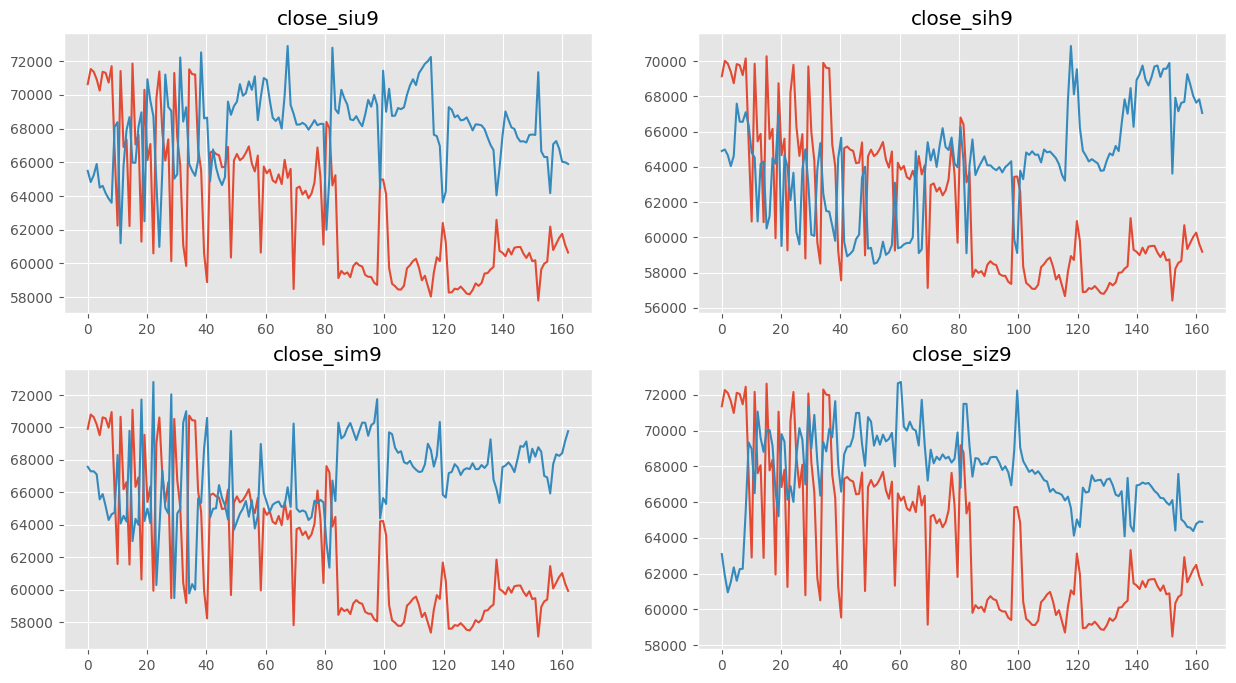

In [33]:
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots()

# Две строки, два столбца. Текущая ячейка - 1
pylab.subplot (2, 2, 1)
plt.plot(np.linspace(0, len(data), len(data)), data['fair_price_siu9'])
plt.plot(np.linspace(0, len(data), len(data)), data['close_siu9'])
pylab.title ("close_siu9")

pylab.subplot (2, 2, 2)
plt.plot(np.linspace(0, len(data), len(data)), data['fair_price_sih9'])
plt.plot(np.linspace(0, len(data), len(data)), data['close_sih9'])
pylab.title ("close_sih9")

pylab.subplot (2, 2, 3)
plt.plot(np.linspace(0, len(data), len(data)), data['fair_price_sim9'])
plt.plot(np.linspace(0, len(data), len(data)), data['close_sim9'])
pylab.title ("close_sim9")

pylab.subplot (2, 2, 4)
plt.plot(np.linspace(0, len(data), len(data)), data['fair_price_siz9'])
plt.plot(np.linspace(0, len(data), len(data)), data['close_siz9'])
pylab.title ("close_siz9")


fig.set_figwidth(15)
fig.set_figheight(8)

plt.show()


### Creating alphas

In [34]:
def get_return_real_and_fair_price(dataframe, column_real_price, column_fair_price):
    returnn = []
    data_real_price = dataframe[column_real_price]
    data_fair_price = dataframe[column_fair_price]
    for i in range(0, len(dataframe)):
        returnn.append((data_real_price[i] / data_fair_price[i]) - 1)
    return returnn

In [35]:
data_real_fair = pd.DataFrame()
data_real_fair['return_siu9'] = get_return_real_and_fair_price(data, 'close_siu9', 'fair_price_siu9')
data_real_fair['return_sih9'] = get_return_real_and_fair_price(data, 'close_sih9', 'fair_price_sih9')
data_real_fair['return_sim9'] = get_return_real_and_fair_price(data, 'close_sim9', 'fair_price_sim9')
data_real_fair['return_siz9'] = get_return_real_and_fair_price(data, 'close_siz9', 'fair_price_siz9')
data_real_fair['close_siu9'] = data['close_siu9']
data_real_fair['close_sih9'] = data['close_sih9']
data_real_fair['close_sim9'] = data['close_sim9']
data_real_fair['close_siz9'] = data['close_siz9']
data_real_fair

,return_siu9,return_sih9,return_sim9,return_siz9,close_siu9,close_sih9,close_sim9,close_siz9
0,-0.072863,-0.061423,-0.033404,-0.115939,65491.0,64904.0,67576.0,63090.0
1,-0.093738,-0.071914,-0.049382,-0.143615,64829.0,64988.0,67300.0,61893.0
2,-0.085973,-0.074306,-0.047216,-0.154747,65235.0,64672.0,67299.0,60949.0
3,-0.070810,-0.077343,-0.043810,-0.141469,65901.0,64044.0,67110.0,61523.0
4,-0.081919,-0.060042,-0.056817,-0.121693,64500.0,64625.0,65571.0,62350.0
...,...,...,...,...,...,...,...,...
157,0.099798,0.150809,0.130936,0.043526,67260.0,68682.0,68349.0,64570.0
158,0.086091,0.133184,0.122722,0.034390,66811.0,68026.0,68250.0,64380.0
159,0.069276,0.122533,0.120994,0.036735,66035.0,67650.0,68412.0,64780.0
160,0.080112,0.137620,0.145280,0.049961,66000.0,67835.0,69156.0,64914.0


In [36]:
neutralize_return = np.zeros((len(data_real_fair), 4))
for i, row in enumerate(data_real_fair.itertuples()):
    for j in range(1, 5):
        neutralize_return[i][j - 1] = (row[j] - (row[1] + row[2] + row[3] + row[4]) / 4)

data_real_fair['neutrl_siu9'] = neutralize_return[:, 0]
data_real_fair['neutrl_sih9'] = neutralize_return[:, 1]
data_real_fair['neutrl_sim9'] = neutralize_return[:, 2]
data_real_fair['neutrl_siz9'] = neutralize_return[:, 3]

In [37]:
data_real_fair

,return_siu9,return_sih9,return_sim9,return_siz9,close_siu9,close_sih9,close_sim9,close_siz9,neutrl_siu9,neutrl_sih9,neutrl_sim9,neutrl_siz9
0,-0.072863,-0.061423,-0.033404,-0.115939,65491.0,64904.0,67576.0,63090.0,-0.001956,0.009484,0.037503,-0.045032
1,-0.093738,-0.071914,-0.049382,-0.143615,64829.0,64988.0,67300.0,61893.0,-0.004076,0.017748,0.040281,-0.053953
2,-0.085973,-0.074306,-0.047216,-0.154747,65235.0,64672.0,67299.0,60949.0,0.004587,0.016254,0.043345,-0.064186
3,-0.070810,-0.077343,-0.043810,-0.141469,65901.0,64044.0,67110.0,61523.0,0.012548,0.006015,0.039548,-0.058111
4,-0.081919,-0.060042,-0.056817,-0.121693,64500.0,64625.0,65571.0,62350.0,-0.001801,0.020076,0.023301,-0.041576
...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.099798,0.150809,0.130936,0.043526,67260.0,68682.0,68349.0,64570.0,-0.006469,0.044542,0.024669,-0.062741
158,0.086091,0.133184,0.122722,0.034390,66811.0,68026.0,68250.0,64380.0,-0.008006,0.039087,0.028625,-0.059706
159,0.069276,0.122533,0.120994,0.036735,66035.0,67650.0,68412.0,64780.0,-0.018108,0.035148,0.033610,-0.050650
160,0.080112,0.137620,0.145280,0.049961,66000.0,67835.0,69156.0,64914.0,-0.023131,0.034377,0.042036,-0.053282


In [38]:
# создание коэффициентов
return_plus = []
return_minus =[]
neutralize_return = np.zeros((len(data_real_fair), 4))
alphas = np.zeros((len(data_real_fair), 4))

for i, row in enumerate(data_real_fair.itertuples()):    
    temp_plus = 0
    temp_minus = 0
    for j in range(9, 13):
        if row[j] > 0:
            temp_plus += row[j]
        else:
            temp_minus += row[j]

    # create alphas
    for j in range(9, 13):
        if neutralize_return[i][j - 9] > 0:
            alphas[i][j - 9] = (-row[j] / temp_plus) / 2
        else:
            alphas[i][j - 9] = (row[j] / temp_minus) / 2

    # return_plus.append(temp_plus)
    # return_minus.append(temp_minus)
        

In [39]:
data_real_fair['alpha_siu9'] = alphas[:, 0]
data_real_fair['alpha_sih9'] = alphas[:, 1]
data_real_fair['alpha_sim9'] = alphas[:, 2]
data_real_fair['alpha_siz9'] = alphas[:, 3]
data_real_fair

,return_siu9,return_sih9,return_sim9,return_siz9,close_siu9,close_sih9,close_sim9,close_siz9,neutrl_siu9,neutrl_sih9,neutrl_sim9,neutrl_siz9,alpha_siu9,alpha_sih9,alpha_sim9,alpha_siz9
0,-0.072863,-0.061423,-0.033404,-0.115939,65491.0,64904.0,67576.0,63090.0,-0.001956,0.009484,0.037503,-0.045032,0.020809,-0.100924,-0.399076,0.479191
1,-0.093738,-0.071914,-0.049382,-0.143615,64829.0,64988.0,67300.0,61893.0,-0.004076,0.017748,0.040281,-0.053953,0.035119,-0.152925,-0.347075,0.464881
2,-0.085973,-0.074306,-0.047216,-0.154747,65235.0,64672.0,67299.0,60949.0,0.004587,0.016254,0.043345,-0.064186,-0.035734,-0.126618,-0.337649,0.500000
3,-0.070810,-0.077343,-0.043810,-0.141469,65901.0,64044.0,67110.0,61523.0,0.012548,0.006015,0.039548,-0.058111,-0.107965,-0.051752,-0.340283,0.500000
4,-0.081919,-0.060042,-0.056817,-0.121693,64500.0,64625.0,65571.0,62350.0,-0.001801,0.020076,0.023301,-0.041576,0.020761,-0.231415,-0.268585,0.479239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.099798,0.150809,0.130936,0.043526,67260.0,68682.0,68349.0,64570.0,-0.006469,0.044542,0.024669,-0.062741,0.046737,-0.321784,-0.178216,0.453263
158,0.086091,0.133184,0.122722,0.034390,66811.0,68026.0,68250.0,64380.0,-0.008006,0.039087,0.028625,-0.059706,0.059115,-0.288626,-0.211374,0.440885
159,0.069276,0.122533,0.120994,0.036735,66035.0,67650.0,68412.0,64780.0,-0.018108,0.035148,0.033610,-0.050650,0.131683,-0.255596,-0.244404,0.368317
160,0.080112,0.137620,0.145280,0.049961,66000.0,67835.0,69156.0,64914.0,-0.023131,0.034377,0.042036,-0.053282,0.151355,-0.224941,-0.275059,0.348645


In [40]:
def get_profit(dataframe, column_data, column_alpha):
    profit = []
    data = dataframe[column_data]
    alpha = dataframe[column_alpha]
    for i in range(1, len(data)):
        profit.append((data[i] - data[i - 1]) * alpha[i - 1])
    return profit


In [43]:
profit_siu9 = get_profit(data_real_fair, 'close_siu9', 'alpha_siu9')
profit_sih9 = get_profit(data_real_fair, 'close_sih9', 'alpha_sih9')
profit_sim9 = get_profit(data_real_fair, 'close_sim9', 'alpha_sim9')
profit_siz9 = get_profit(data_real_fair, 'close_siz9', 'alpha_siz9')

In [46]:
l = list(map(sum, zip(profit_siu9, profit_sih9, profit_sim9, profit_siz9)))
l.insert(0, 0)
data_real_fair['profit'] = l
data_real_fair

,return_siu9,return_sih9,return_sim9,return_siz9,close_siu9,close_sih9,close_sim9,close_siz9,neutrl_siu9,neutrl_sih9,neutrl_sim9,neutrl_siz9,alpha_siu9,alpha_sih9,alpha_sim9,alpha_siz9,profit
0,-0.072863,-0.061423,-0.033404,-0.115939,65491.0,64904.0,67576.0,63090.0,-0.001956,0.009484,0.037503,-0.045032,0.020809,-0.100924,-0.399076,0.479191,0.000000
1,-0.093738,-0.071914,-0.049382,-0.143615,64829.0,64988.0,67300.0,61893.0,-0.004076,0.017748,0.040281,-0.053953,0.035119,-0.152925,-0.347075,0.464881,-485.699710
2,-0.085973,-0.074306,-0.047216,-0.154747,65235.0,64672.0,67299.0,60949.0,0.004587,0.016254,0.043345,-0.064186,-0.035734,-0.126618,-0.337649,0.500000,-375.918630
3,-0.070810,-0.077343,-0.043810,-0.141469,65901.0,64044.0,67110.0,61523.0,0.012548,0.006015,0.039548,-0.058111,-0.107965,-0.051752,-0.340283,0.500000,406.532695
4,-0.081919,-0.060042,-0.056817,-0.121693,64500.0,64625.0,65571.0,62350.0,-0.001801,0.020076,0.023301,-0.041576,0.020761,-0.231415,-0.268585,0.479239,1058.386407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.099798,0.150809,0.130936,0.043526,67260.0,68682.0,68349.0,64570.0,-0.006469,0.044542,0.024669,-0.062741,0.046737,-0.321784,-0.178216,0.453263,156.799791
158,0.086091,0.133184,0.122722,0.034390,66811.0,68026.0,68250.0,64380.0,-0.008006,0.039087,0.028625,-0.059706,0.059115,-0.288626,-0.211374,0.440885,121.628874
159,0.069276,0.122533,0.120994,0.036735,66035.0,67650.0,68412.0,64780.0,-0.018108,0.035148,0.033610,-0.050650,0.131683,-0.255596,-0.244404,0.368317,204.761478
160,0.080112,0.137620,0.145280,0.049961,66000.0,67835.0,69156.0,64914.0,-0.023131,0.034377,0.042036,-0.053282,0.151355,-0.224941,-0.275059,0.348645,-184.376459


In [47]:
def profit_and_loss(dataframe):
    p_and_l = []
    for i in range(len(dataframe)):
        p_and_l.append(dataframe.head(i).sum())
    return p_and_l

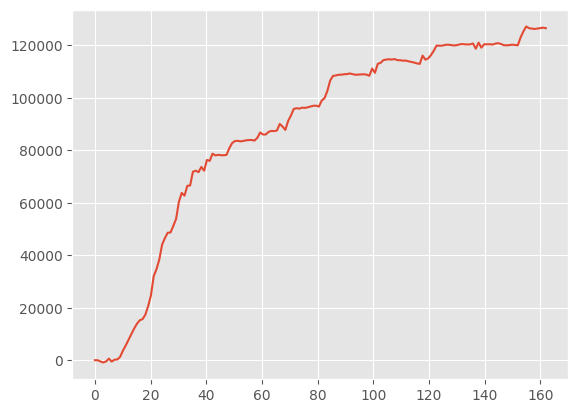

In [48]:
plt.plot(np.linspace(0, len(data_real_fair), len(data_real_fair)), profit_and_loss(data_real_fair['profit']))